# This code is check if the degree of phase precession increases with faster turns. Experimental data is based on Lomi et al, 2023. This code is written by Zilong Ji, 2024.

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from numpy import deg2rad
from scipy.stats import mannwhitneyu
import sys
sys.path.append('/home/zilong/Desktop/HDPhasePrecession/CircularLinearReg')
from core import cl_corr
import HD_utils

%load_ext autoreload
%autoreload 2


In [13]:
def plot_phaseprecession(ax, ppoh, pot, pspt, psph, hd_mean, spike_phase, config, addfitline=True):
    
    spike_phase = spike_phase + np.pi #[-pi, pi] -> [0, 2pi]
    
    alpha = 0.4
    speed_low = config['speed_low']
    speed_high = config['speed_high']
    duration_threshold = config['duration_threshold']
    speed_smooth_sigma = config['speed_smooth_sigma']
    
    #calculate angular speed
    angular_speed = HD_utils.calculate_angular_speed(ppoh, pot, sigma=speed_smooth_sigma)
    
    #convert psph to radian
    psph = deg2rad(psph)
    hd_mean = deg2rad(hd_mean)
    
    psph_centered = np.mod(psph - hd_mean + np.pi, 2 * np.pi)
    
    #CCW plot in ax1
    continuous_periods_CCW = HD_utils.find_continuous_periods_between_low_high(angular_speed, pot, speed_low=-speed_low, speed_high=-speed_high, duration_threshold=duration_threshold)
    indx = []
    for i in range(len(continuous_periods_CCW)):
        indx.extend(np.where((pspt > continuous_periods_CCW[i][0]) & (pspt < continuous_periods_CCW[i][1]))[0])
        
    psph_CCW = psph_centered[indx]
    spike_phase_CCW = spike_phase[indx]
    
    
    #CW plot in ax2
    continuous_periods_CW = HD_utils.find_continuous_periods_between_low_high(angular_speed, pot, speed_low=speed_low, speed_high=speed_high, duration_threshold=duration_threshold)
    #keep the index when pspt is within continuous_periods
    indx = [] 
    for i in range(len(continuous_periods_CW)):
        indx.extend(np.where((pspt > continuous_periods_CW[i][0]) & (pspt < continuous_periods_CW[i][1]))[0])
    
    psph_CW = psph_centered[indx]
    spike_phase_CW = spike_phase[indx]
    
    
    #ax3 plot
    #flip   psph_CCW by 2pi - psph_CCW
    psph_CCW = 2 * np.pi - psph_CCW
    #combine CCW and CW togther and plot
    psph_combined = np.concatenate((psph_CCW, psph_CW))
    spike_phase_combined = np.concatenate((spike_phase_CCW, spike_phase_CW))
    
    ax.scatter(psph_combined, spike_phase_combined, s=0.2, color='black', alpha=alpha)
    ax.scatter(psph_combined, [spike_phase_combined[i] + 2 * np.pi for i in range(len(spike_phase_combined))], s=0.2, color='black', alpha=alpha)
    
    circ_lin_corr, pval, slope, phi0, RR = cl_corr(psph_combined, spike_phase_combined, min_slope=-1/2/np.pi, max_slope=1/2/np.pi, bootstrap_iter=1000, return_pval=True)

    if addfitline:
        # Plot the circular-linear regression
        x = np.linspace(0, 2 * np.pi, 100)
        y = 2 * np.pi * slope * x + phi0
        ax.plot(x, y, color='red', linewidth=1)
        #add intercepr of 2*pi, and plot the line again
        y = 2 * np.pi * slope * x + phi0 + 2 * np.pi
        ax.plot(x, y, color='red', linewidth=1)
        #add intercepr of 4*pi, and plot the line again
        y = 2 * np.pi * slope * x + phi0 + 4 * np.pi
        ax.plot(x, y, color='red', linewidth=1)
        #substrac intercepr of 2*pi, and plot the line again
        y = 2 * np.pi * slope * x + phi0 - 2 * np.pi
        ax.plot(x, y, color='red', linewidth=1)    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(0, 2*np.pi)
    ax.set_xticks([0, np.pi, 2*np.pi])
    ax.set_xticklabels(["$-\pi$", "$0$", "$\pi$"])
    
    ax.set_ylim(0, 4*np.pi)
    ax.set_yticks([0,  2*np.pi,  4*np.pi])
    ax.set_yticklabels(["$0$", "$2\pi$", "$4\pi$"])
    

    return ax, pval, circ_lin_corr

def get_phaseprecession(ppoh, pot, pspt, psph, hd_mean, spike_phase, config, addfitline=True):
    
    spike_phase = spike_phase + np.pi #[-pi, pi] -> [0, 2pi]
    
    alpha = 0.4
    speed_low = config['speed_low']
    speed_high = config['speed_high']
    duration_threshold = config['duration_threshold']
    speed_smooth_sigma = config['speed_smooth_sigma']
    
    #calculate angular speed
    angular_speed = HD_utils.calculate_angular_speed(ppoh, pot, sigma=speed_smooth_sigma)
    
    #convert psph to radian
    psph = deg2rad(psph)
    hd_mean = deg2rad(hd_mean)
    
    psph_centered = np.mod(psph - hd_mean + np.pi, 2 * np.pi)
    
    #CCW plot in ax1
    continuous_periods_CCW = HD_utils.find_continuous_periods_between_low_high(angular_speed, pot, speed_low=-speed_low, speed_high=-speed_high, duration_threshold=duration_threshold)
    indx = []
    for i in range(len(continuous_periods_CCW)):
        indx.extend(np.where((pspt > continuous_periods_CCW[i][0]) & (pspt < continuous_periods_CCW[i][1]))[0])
        
    psph_CCW = psph_centered[indx]
    spike_phase_CCW = spike_phase[indx]
    
    
    #CW plot in ax2
    continuous_periods_CW = HD_utils.find_continuous_periods_between_low_high(angular_speed, pot, speed_low=speed_low, speed_high=speed_high, duration_threshold=duration_threshold)
    #keep the index when pspt is within continuous_periods
    indx = [] 
    for i in range(len(continuous_periods_CW)):
        indx.extend(np.where((pspt > continuous_periods_CW[i][0]) & (pspt < continuous_periods_CW[i][1]))[0])
    
    psph_CW = psph_centered[indx]
    spike_phase_CW = spike_phase[indx]
    
    
    #ax3 plot
    #flip   psph_CCW by 2pi - psph_CCW
    psph_CCW = 2 * np.pi - psph_CCW
    #combine CCW and CW togther and plot
    psph_combined = np.concatenate((psph_CCW, psph_CW))
    spike_phase_combined = np.concatenate((spike_phase_CCW, spike_phase_CW))
    
    circ_lin_corr, pval, slope, phi0, RR = cl_corr(psph_combined, spike_phase_combined, min_slope=-1/2/np.pi, max_slope=1/2/np.pi, bootstrap_iter=1000, return_pval=True)
    

    return pval, circ_lin_corr



## Section 0: save of directional tuning map from all head direction cells

Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_170719_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_100919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_040919_T1_sdata.mat
'light1' not found in /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_040919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_250719_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_090819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_030919_T1_sdata.mat
'light1' not found in /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_030919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_230819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_200819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhas

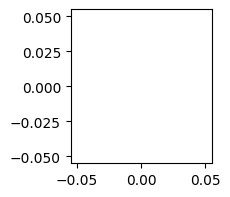

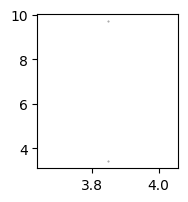

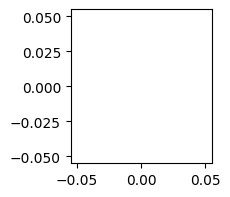

In [11]:
base_dir = '/home/zilong/Desktop/HDPhasePrecession/LomiData'
output_dir = '/home/zilong/Desktop/HDPhasePrecession/figures/slowfast/all/'
output_skip_dir = '/home/zilong/Desktop/HDPhasePrecession/figures/slowfast/skip/'
output_nonskip_dir = '/home/zilong/Desktop/HDPhasePrecession/figures/slowfast/nonskip/'
output_nontheta_dir = '/home/zilong/Desktop/HDPhasePrecession/figures/slowfast/nontheta/'

# Configuration
config = {
    'hd_bins': 60,
    'hd_boxcar': 3,
    'speed_low': 1.0,
    'speed_high': 1.5,
    'duration_threshold': 0.5,
    'speed_smooth_sigma': 40,  #0.8,0.8,40 gives 43% pp cells
    'movingdirection_sigma': 5, #time bin size 20 ms, so 5 is 100 ms
    'interpolation_factor': 1, #1 is 0.02s, and 2 is 0.01s
    'IFR_window':0.2
}

# Create output directories if they don't exist
for dir_path in [output_dir, output_skip_dir, output_nonskip_dir, output_nontheta_dir]:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)    
    os.makedirs(dir_path)

total_hd_cells = 0

all_tw = []
nontheta_tw = []
theta_tw = []
theta_nonskip_tw = []
theta_skip_tw = []

all_ppp = []
nontheta_ppp = []
theta_ppp = []
theta_nonskip_ppp = []
theta_skip_ppp = []

all_clr = []
nontheta_clr = []
theta_clr = []
theta_nonskip_clr = []
theta_skip_clr = []


matnames = {}

# Iterate through each subfolder in the base directory
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        # Iterate through each .mat file in the subfolder
        for file in os.listdir(subdir_path):
            if file.endswith('_sdata.mat'):
                file_path = os.path.join(subdir_path, file)
                print(f"Processing {file_path}")
                ratname = file.split('_')[0]
                data_dict = HD_utils.load_data(ratname, file_path)
                
                if data_dict is not None:
                    ppoh = data_dict['poh']
                    pot = data_dict['pot'].flatten()
                    
                    ppox = data_dict['ppox'].flatten()
                    ppoy = data_dict['ppoy'].flatten()
                    global_freq = data_dict['global_freq'][0][0]
                    
                    #interpolte pot 
                    sampling_interval = np.diff(pot).mean()
                    new_interval = sampling_interval / config['interpolation_factor']
                    pot_interp = np.arange(0, pot[-1], new_interval)
                    
                    for cell_name, cell_data in data_dict['cells_data'].items():
                        psph = cell_data['psph'].flatten()
                        pspt = cell_data['pspt'].flatten()
                        spike_phase = cell_data['spike_phase'].flatten()
                        hd_pval = cell_data['pval'][0][0]
                        hd_mean = cell_data['hd_mean'][0][0]
                        hd_std = cell_data['hd_std'][0][0]
                        tune_width = cell_data['tune_width'][0][0]
                        autocorrelogram = cell_data['autocorrelogram']
                        intrinsic_freq = cell_data['intrinsic_freq'][0][0]
                        hd_rayleigh = cell_data['hd_rayleigh'][0][0]
                        hd_rayleigh_shuffle_99 = cell_data['hd_rayleigh_shuffle_99'][0][0]
                        peak_fr = cell_data['peak_fr'][0][0]
                        intrinsic_freq = cell_data['intrinsic_freq'][0][0]
                        cell_type = cell_data['cell_type']
                        
                        #store matname for each cell
                        matnames[cell_name] = [ratname, file_path]
                        
                        #if hd_pval < 0.05: #select only head direction tuned cells
                        if hd_rayleigh > hd_rayleigh_shuffle_99 and peak_fr > 1: #select only head direction tuned cells with rayleigh vector > 99% shuffle and the peak firing rate in the directional field is greater than 1 Hz
                            try:
                                #plot
                                fig = plt.figure(figsize=(4,2))
                                gs=fig.add_gridspec(1,2)
                                
                                #plot phase precession against tuning angle
                                ax3 = fig.add_subplot(gs[0, 0])
                                ax3, pval, clr = plot_phaseprecession(ax3, ppoh, pot, pspt, psph, hd_mean, spike_phase, config)
                                
                                output_path = os.path.join(output_dir, f"{cell_name}.png")
                                plt.tight_layout()
                                plt.savefig(output_path)
                                
                                #save tuning width
                                all_tw.append(tune_width)

                                #save ppp 
                                all_ppp.append(pval)
                                #save circ-linear correlation
                                all_clr.append(clr)

                                #save fig according to cell type in different folders
                                if cell_type == ' Strong ThetaxHD ' or cell_type == ' Strong ThetaxHD  & skip': #This is a theta modulated HD cell
                                    
                                    #save tuning width
                                    theta_tw.append(tune_width)

                                    #save ppp
                                    theta_ppp.append(pval)
                                    #save circ-linear correlation
                                    theta_clr.append(clr)

                                                                        
                                    if cell_type == ' Strong ThetaxHD  & skip': #this is a theta skipping cell
                                        #save tuning width
                                        theta_skip_tw.append(tune_width)
                                        #save ppp
                                        theta_skip_ppp.append(pval)

                                        #save circ-linear correlation
                                        theta_skip_clr.append(clr)

                                        output_skip_path = os.path.join(output_skip_dir, f"{cell_name}.png")
                                        plt.savefig(output_skip_path)
                                    elif cell_type == ' Strong ThetaxHD ': #this is a theta modulated non-skipping cell
                                        #save tuning width
                                        theta_nonskip_tw.append(tune_width)

                                        #save ppp
                                        theta_nonskip_ppp.append(pval)

                                        #save circ-linear correlation
                                        theta_nonskip_clr.append(clr)

                                        output_nonskip_path = os.path.join(output_nonskip_dir, f"{cell_name}.png")
                                        plt.savefig(output_nonskip_path)
                                elif cell_type == ' HDC ':
                                    nontheta_tw.append(tune_width)

                                    nontheta_ppp.append(pval)

                                    nontheta_clr.append(clr)
 
                                    output_nontheta_path = os.path.join(output_nontheta_dir, f"{cell_name}.png")
                                    plt.savefig(output_nontheta_path)
                                    
                                plt.close(fig)
                                
                                total_hd_cells += 1
                            except Exception as e:
                                print(f"Error processing {cell_name}: {e}")
                        
print(f"Total number of HD cells processed: {total_hd_cells}")


## Section 1: compare circular-linear correlation coefficient between phase-angle and phase-time

/tmp/ipykernel_3401933/2466008814.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)
/tmp/ipykernel_3401933/2466008814.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)
/tmp/ipykernel_3401933/2466008814.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)


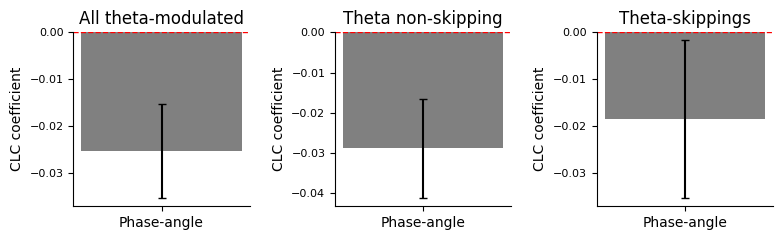

In [12]:
#compare theta_clr and theta_clr_time with mean and sem

# Create arrays for circ-linear correlation
clr_theta = np.array(theta_clr)
clr_theta_nonskip = np.array(theta_nonskip_clr)
clr_theta_skip = np.array(theta_skip_clr)


fig, axs = plt.subplots(1, 3, figsize=(8, 2.5), dpi=100)

#plot all theta-modulated HD cells
ax = axs[0]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta = np.mean(clr_theta)
sem_clr_theta = np.std(clr_theta) / np.sqrt(len(clr_theta))

# Plot the bars
bar_width = 0.5
bar1 = ax.bar(['Phase-angle'], [mean_clr_theta], bar_width, yerr=[sem_clr_theta], capsize=3, color='grey')

ax.set_title('All theta-modulated')


#plot theta-modulated but not theta-skipping HD cells
ax = axs[1]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta_nonskip = np.mean(clr_theta_nonskip)
sem_clr_theta_nonskip = np.std(clr_theta_nonskip) / np.sqrt(len(clr_theta_nonskip))

# Plot the bars
bar_width = 0.5
bar1 = ax.bar(['Phase-angle'], [mean_clr_theta_nonskip], bar_width, yerr=[sem_clr_theta_nonskip], capsize=3, color='grey')

ax.set_title('Theta non-skipping')

#plot theta-skipping HD cells
ax = axs[2]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta_skip = np.mean(clr_theta_skip)
sem_clr_theta_skip = np.std(clr_theta_skip) / np.sqrt(len(clr_theta_skip))
# Plot the bars
bar_width = 0.5

bar1 = ax.bar(['Phase-angle'], [mean_clr_theta_skip], bar_width, yerr=[sem_clr_theta_skip], capsize=3, color='grey')

ax.set_title('Theta-skippings')


for ax in axs:
    #y=0
    ax.axhline(0, color='red', linewidth=1, linestyle='--')

    # Add labels and title
    ax.set_ylabel('CLC coefficient', fontsize=10)
    #roatte xlabel 45 degree
    ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)

    #tickfontsize
    ax.tick_params(axis='y', which='major', labelsize=8)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)



plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/circ_lin_corr_angle_vs_time.pdf')

/tmp/ipykernel_3401933/152526531.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase vs angle', 'Phase vs time'], rotation=0, ha='center', fontsize=10)


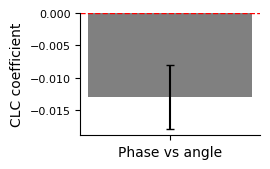

In [10]:
#compare theta_clr and theta_clr_time with mean and sem

# Create arrays for circ-linear correlation
clr_theta = np.array(theta_clr)
clr_theta_nonskip = np.array(theta_nonskip_clr)
clr_theta_skip = np.array(theta_skip_clr)

#remove nan 

fig, ax = plt.subplots(1, 1, figsize=(2.8, 1.8), dpi=100)


# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta = np.mean(clr_theta)
sem_clr_theta = np.std(clr_theta) / np.sqrt(len(clr_theta))

# Plot the bars
bar_width = 0.5
bar1 = ax.bar(['Phase-angle'], [mean_clr_theta], bar_width, yerr=[sem_clr_theta], capsize=3, color='grey')


#y=0
ax.axhline(0, color='red', linewidth=1, linestyle='--')

# Add labels and title
ax.set_ylabel('CLC coefficient', fontsize=10)
#roatte xlabel 45 degree
ax.set_xticklabels(['Phase vs angle', 'Phase vs time'], rotation=0, ha='center', fontsize=10)

#tickfontsize
ax.tick_params(axis='y', which='major', labelsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/precession_slowfast_thetacells.pdf')

## Section 2: plot phase against turning angle, time since turning for only significant phase precession of turning angle cells

mann-whitney u test between phase-angle and phase-time: 0.3490960886799167
mann-whitney u test between phase-angle and phase-time for theta nonskip: 0.3894094485621661
mann-whitney u test between phase-angle and phase-time for theta skip: 0.8290726817042607


/tmp/ipykernel_2626668/3633745855.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)
/tmp/ipykernel_2626668/3633745855.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)
/tmp/ipykernel_2626668/3633745855.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)


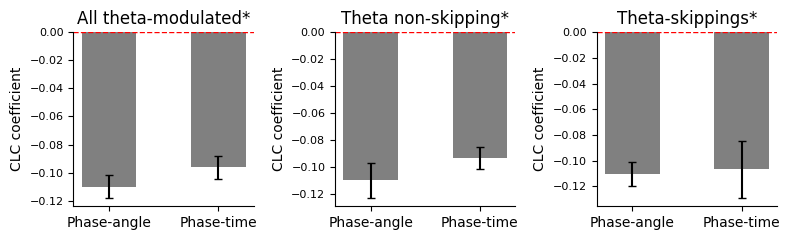

In [8]:
#compare theta_clr and theta_clr_time with mean and sem

# Create arrays for circ-linear correlation
clr_theta = np.array(theta_clr)[(np.array(theta_ppp)<0.05) & (np.array(theta_clr)<0)]
clr_theta_nonskip = np.array(theta_nonskip_clr)[(np.array(theta_nonskip_ppp)<0.05) & (np.array(theta_nonskip_clr)<0)]
clr_theta_skip = np.array(theta_skip_clr)[(np.array(theta_skip_ppp)<0.05) & (np.array(theta_skip_clr)<0)] 

fig, axs = plt.subplots(1, 3, figsize=(8, 2.5), dpi=100)

#plot all theta-modulated HD cells
ax = axs[0]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta = np.mean(clr_theta)
sem_clr_theta = np.std(clr_theta) / np.sqrt(len(clr_theta))

# Plot the bars
bar_width = 0.5
bar1 = ax.bar(['Phase-angle'], [mean_clr_theta], bar_width, yerr=[sem_clr_theta], capsize=3, color='grey')

ax.set_title('All theta-modulated*')

# mann-whitney u test between theta and theta_time
u, p = mannwhitneyu(clr_theta)
print('mann-whitney u test between phase-angle and phase-time:', p)


#plot theta-modulated but not theta-skipping HD cells
ax = axs[1]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta_nonskip = np.mean(clr_theta_nonskip)
sem_clr_theta_nonskip = np.std(clr_theta_nonskip) / np.sqrt(len(clr_theta_nonskip))

# Plot the bars
bar_width = 0.5
bar1 = ax.bar(['Phase-angle'], [mean_clr_theta_nonskip], bar_width, yerr=[sem_clr_theta_nonskip], capsize=3, color='grey')

ax.set_title('Theta non-skipping*')

# mann-whitney u test between theta_nonskip and theta_nonskip_time
u, p = mannwhitneyu(clr_theta_nonskip)

print('mann-whitney u test between phase-angle and phase-time for theta nonskip:', p)

#plot theta-skipping HD cells
ax = axs[2]

# Plot the mean and standard error of the circ-linear correlation
mean_clr_theta_skip = np.mean(clr_theta_skip)
sem_clr_theta_skip = np.std(clr_theta_skip) / np.sqrt(len(clr_theta_skip))

# Plot the bars
bar_width = 0.5

bar1 = ax.bar(['Phase-angle', 'Phase-time'], [mean_clr_theta_skip], bar_width, yerr=[sem_clr_theta_skip], capsize=3, color='grey')

ax.set_title('Theta-skippings*')

for ax in axs:
    #y=0
    ax.axhline(0, color='red', linewidth=1, linestyle='--')

    # Add labels and title
    ax.set_ylabel('CLC coefficient', fontsize=10)
    #roatte xlabel 45 degree
    ax.set_xticklabels(['Phase-angle', 'Phase-time'], rotation=0, ha='center', fontsize=10)

    #tickfontsize
    ax.tick_params(axis='y', which='major', labelsize=8)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/circ_lin_corr_angle_vs_time_significant.pdf')

## Secton 3: change the speed window and check the precession degree

In [21]:
base_dir = '/home/zilong/Desktop/HDPhasePrecession/LomiData'

speed_window = [[0.1, 0.6], [0.6, 1.2], [1.2, 1.8]]

theta_clr_all = []

for speed_low, speed_high in speed_window:

    # Configuration
    config = {
        'hd_bins': 60,
        'hd_boxcar': 3,
        'speed_low': speed_low,
        'speed_high': speed_high,
        'duration_threshold': 0.5,
        'speed_smooth_sigma': 40,  #0.8,0.8,40 gives 43% pp cells
        'movingdirection_sigma': 5, #time bin size 20 ms, so 5 is 100 ms
        'interpolation_factor': 1, #1 is 0.02s, and 2 is 0.01s
        'IFR_window':0.2
    }

    total_hd_cells = 0

    all_tw = []
    nontheta_tw = []
    theta_tw = []
    theta_nonskip_tw = []
    theta_skip_tw = []

    all_ppp = []
    nontheta_ppp = []
    theta_ppp = []
    theta_nonskip_ppp = []
    theta_skip_ppp = []

    all_clr = []
    nontheta_clr = []
    theta_clr = []
    theta_nonskip_clr = []
    theta_skip_clr = []


    matnames = {}

    # Iterate through each subfolder in the base directory
    for subdir in os.listdir(base_dir):
        subdir_path = os.path.join(base_dir, subdir)
        if os.path.isdir(subdir_path):
            # Iterate through each .mat file in the subfolder
            for file in os.listdir(subdir_path):
                if file.endswith('_sdata.mat'):
                    file_path = os.path.join(subdir_path, file)
                    print(f"Processing {file_path}")
                    ratname = file.split('_')[0]
                    data_dict = HD_utils.load_data(ratname, file_path)
                    
                    if data_dict is not None:
                        ppoh = data_dict['poh']
                        pot = data_dict['pot'].flatten()
                        
                        ppox = data_dict['ppox'].flatten()
                        ppoy = data_dict['ppoy'].flatten()
                        global_freq = data_dict['global_freq'][0][0]
                        
                        #interpolte pot 
                        sampling_interval = np.diff(pot).mean()
                        new_interval = sampling_interval / config['interpolation_factor']
                        pot_interp = np.arange(0, pot[-1], new_interval)
                        
                        for cell_name, cell_data in data_dict['cells_data'].items():
                            psph = cell_data['psph'].flatten()
                            pspt = cell_data['pspt'].flatten()
                            spike_phase = cell_data['spike_phase'].flatten()
                            hd_pval = cell_data['pval'][0][0]
                            hd_mean = cell_data['hd_mean'][0][0]
                            hd_std = cell_data['hd_std'][0][0]
                            tune_width = cell_data['tune_width'][0][0]
                            autocorrelogram = cell_data['autocorrelogram']
                            intrinsic_freq = cell_data['intrinsic_freq'][0][0]
                            hd_rayleigh = cell_data['hd_rayleigh'][0][0]
                            hd_rayleigh_shuffle_99 = cell_data['hd_rayleigh_shuffle_99'][0][0]
                            peak_fr = cell_data['peak_fr'][0][0]
                            intrinsic_freq = cell_data['intrinsic_freq'][0][0]
                            cell_type = cell_data['cell_type']
                            
                            #store matname for each cell
                            matnames[cell_name] = [ratname, file_path]
                            
                            #if hd_pval < 0.05: #select only head direction tuned cells
                            if hd_rayleigh > hd_rayleigh_shuffle_99 and peak_fr > 1: #select only head direction tuned cells with rayleigh vector > 99% shuffle and the peak firing rate in the directional field is greater than 1 Hz
                                try:
                                    pval, clr = get_phaseprecession(ppoh, pot, pspt, psph, hd_mean, spike_phase, config)
                                    
                                    #save tuning width
                                    all_tw.append(tune_width)

                                    #save ppp 
                                    all_ppp.append(pval)
                                    #save circ-linear correlation
                                    all_clr.append(clr)

                                    #save fig according to cell type in different folders
                                    if cell_type == ' Strong ThetaxHD ' or cell_type == ' Strong ThetaxHD  & skip': #This is a theta modulated HD cell
                                        
                                        #save tuning width
                                        theta_tw.append(tune_width)

                                        #save ppp
                                        theta_ppp.append(pval)
                                        #save circ-linear correlation
                                        theta_clr.append(clr)

                                                                            
                                        if cell_type == ' Strong ThetaxHD  & skip': #this is a theta skipping cell
                                            #save tuning width
                                            theta_skip_tw.append(tune_width)
                                            #save ppp
                                            theta_skip_ppp.append(pval)

                                            #save circ-linear correlation
                                            theta_skip_clr.append(clr)
                                        elif cell_type == ' Strong ThetaxHD ': #this is a theta modulated non-skipping cell
                                            #save tuning width
                                            theta_nonskip_tw.append(tune_width)

                                            #save ppp
                                            theta_nonskip_ppp.append(pval)

                                            #save circ-linear correlation
                                            theta_nonskip_clr.append(clr)

                                    elif cell_type == ' HDC ':
                                        nontheta_tw.append(tune_width)

                                        nontheta_ppp.append(pval)

                                        nontheta_clr.append(clr)
                                        

                                    total_hd_cells += 1
                                except Exception as e:
                                    print(f"Error processing {cell_name}: {e}")
                            
    print(f"Total number of HD cells processed: {total_hd_cells}")

    theta_clr_all.append(theta_clr)

Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_170719_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_100919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_040919_T1_sdata.mat
'light1' not found in /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_040919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_250719_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_090819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_030919_T1_sdata.mat
'light1' not found in /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_030919_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_230819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhasePrecession/LomiData/DATA r652/R652_200819_T1_sdata.mat
Processing /home/zilong/Desktop/HDPhas

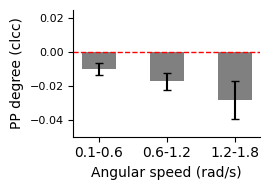

In [37]:
#for each list in theta_clr_all, get the mean and std, and do bar plot for each of them
fig, ax = plt.subplots(1, 1, figsize=(2.8, 2.0), dpi=100)

for i, theta_clr_i in enumerate(theta_clr_all):
    # Create arrays for circ-linear correlation
    clr_theta = np.array(theta_clr_i)

    # Plot the mean and standard error of the circ-linear correlation
    mean_clr_theta = np.mean(clr_theta)
    sem_clr_theta = np.std(clr_theta) / np.sqrt(len(clr_theta))

    # Plot the bars
    bar_width = 0.5
    bar1 = ax.bar([f'{speed_window[i][0]}-{speed_window[i][1]}'], [mean_clr_theta], bar_width, yerr=[sem_clr_theta], capsize=3, color='grey')

#add y=0 as dashed line
ax.axhline(0, color='red', linewidth=1, linestyle='--')

ax.set_ylim(-0.05, 0.025)
#yticks as [-0.05, -0.03, 0.01, 0.01]
ax.set_yticks([-0.04, -0.02, 0, 0.02])

ax.set_xlabel('Angular speed (rad/s)', fontsize=10)
ax.set_ylabel('PP degree (clcc)', fontsize=10)

#tickfontsize as 8
ax.tick_params(axis='y', which='major', labelsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/precession_slowfast.pdf')